<a href="https://colab.research.google.com/github/carbform/Climate_Data_Plotting/blob/main/demo_precipitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cartopy
!pip install rioxarray
!pip install proplot
!pip uninstall shapely
!pip install shapely --no-binary shapely
import rioxarray as rio
import numpy as np
import xarray as xr
import proplot as plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: Shapely 1.8.2
Uninstalling Shapely-1.8.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.2.tar.gz (198 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.2-cp37-cp37m-linux_x86_64.whl size=669002 sha256=52e3881c9ed563dabc6730825ffe7d6977dcfb9fb50ff843d3654db5adcac33a
  

In [2]:
plot.rc.reset()

# Font properties (self-explanatory)
#plot.register_fonts('/home/sarat/anaconda3/pkgs/proplot-0.8.1-pyhd8ed1ab_0/site-packages/proplot/fonts/IBMPlexSans-SemiBold.ttf')
plot.rc['font.name'] = 'IBM Plex Sans'
plot.rc['font.weight']='bold'
plot.rc['font.size']=10

# Tick propreties (self-explanatory)
plot.rc['tick.labelsize']=10
plot.rc['xtick.minor.visible'] =   False
plot.rc['ytick.minor.visible']=   False
plot.rc['tick.len']=2
plot.rc['tick.dir']= 'out'
plot.rc['xtick.major.size']=3
plot.rc['ytick.major.size']=3

# Grid properties (self-explanatory)
plot.rc['grid']=False
plot.rc['grid.linewidth']=0.25
#plot.rc['grid.linestyle']=(0, (5, 10))

# Misc
plot.rc['meta.width']=1.5 # Line width in the plots
plot.rc['subplots.tight']= True # Tight layout for the subplots
plot.rc['colorbar.insetpad']='0.5em' # Insert whitespace around the colorbar


Using xarray to load the climate data
For this example, we will be using the Gridded Rainfall Data from Indian Meteorological Department (IMD) which is available as a netCDF (.nc ) file. NetCDF is the most commonly used file format to store gridded climate data which is also CF compliant. Download the .nc files from the given link : Rainfall Data.

We will use xarray to read the nc file

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:

ds = xr.open_dataset('/content/gdrive/MyDrive/era5_tp_jjas.nc') 
ds

<xarray.Dataset>
Dimensions:    (longitude: 129, latitude: 129, time: 168)
Coordinates:
  * longitude  (longitude) float32 66.0 66.25 66.5 66.75 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 6.75 6.5 6.25 6.0
  * time       (time) datetime64[ns] 1979-06-01 1979-07-01 ... 2020-09-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-02-22 05:52:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
ds_mean = ds.mtpr.mean('time')
ds_var = ds.mtpr.var('time')
ds_mean

<xarray.DataArray 'mtpr' (latitude: 129, longitude: 129)>
array([[4.4311932e-07, 7.1069888e-07, 3.2413993e-06, ..., 3.2341952e-05,
        3.3084547e-05, 3.9031063e-05],
       [2.8021410e-07, 3.4112531e-07, 3.2916762e-06, ..., 3.5896446e-05,
        3.6588746e-05, 4.0384177e-05],
       [2.6115663e-07, 1.6184744e-07, 2.4679355e-07, ..., 2.5088973e-05,
        2.7344426e-05, 3.2927575e-05],
       ...,
       [4.3809385e-05, 4.4231136e-05, 4.4650889e-05, ..., 4.8774451e-05,
        5.1558072e-05, 5.3930475e-05],
       [4.4044758e-05, 4.4453031e-05, 4.4887260e-05, ..., 4.7172973e-05,
        5.0003047e-05, 5.2574967e-05],
       [4.3558084e-05, 4.3960681e-05, 4.4530316e-05, ..., 4.5073248e-05,
        4.7700192e-05, 4.9859129e-05]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 66.0 66.25 66.5 66.75 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 6.75 6.5 6.25 6.0

findfont: Font family ['IBM Plex Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IBM Plex Sans'] not found. Falling back to DejaVu Sans.


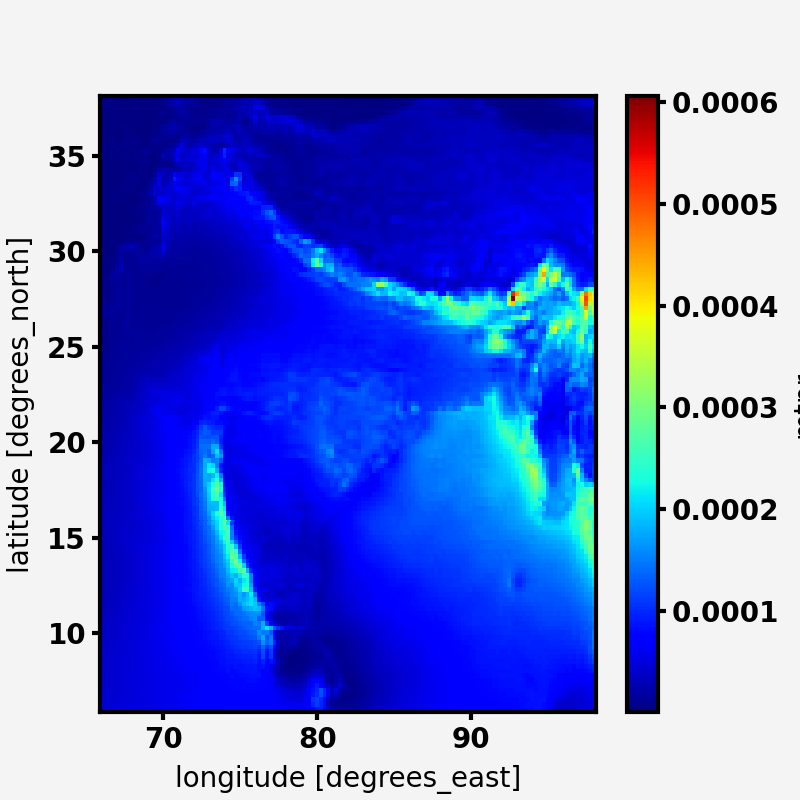

In [6]:
ds_mean.plot(cmap='jet')

findfont: Font family ['IBM Plex Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IBM Plex Sans'] not found. Falling back to DejaVu Sans.


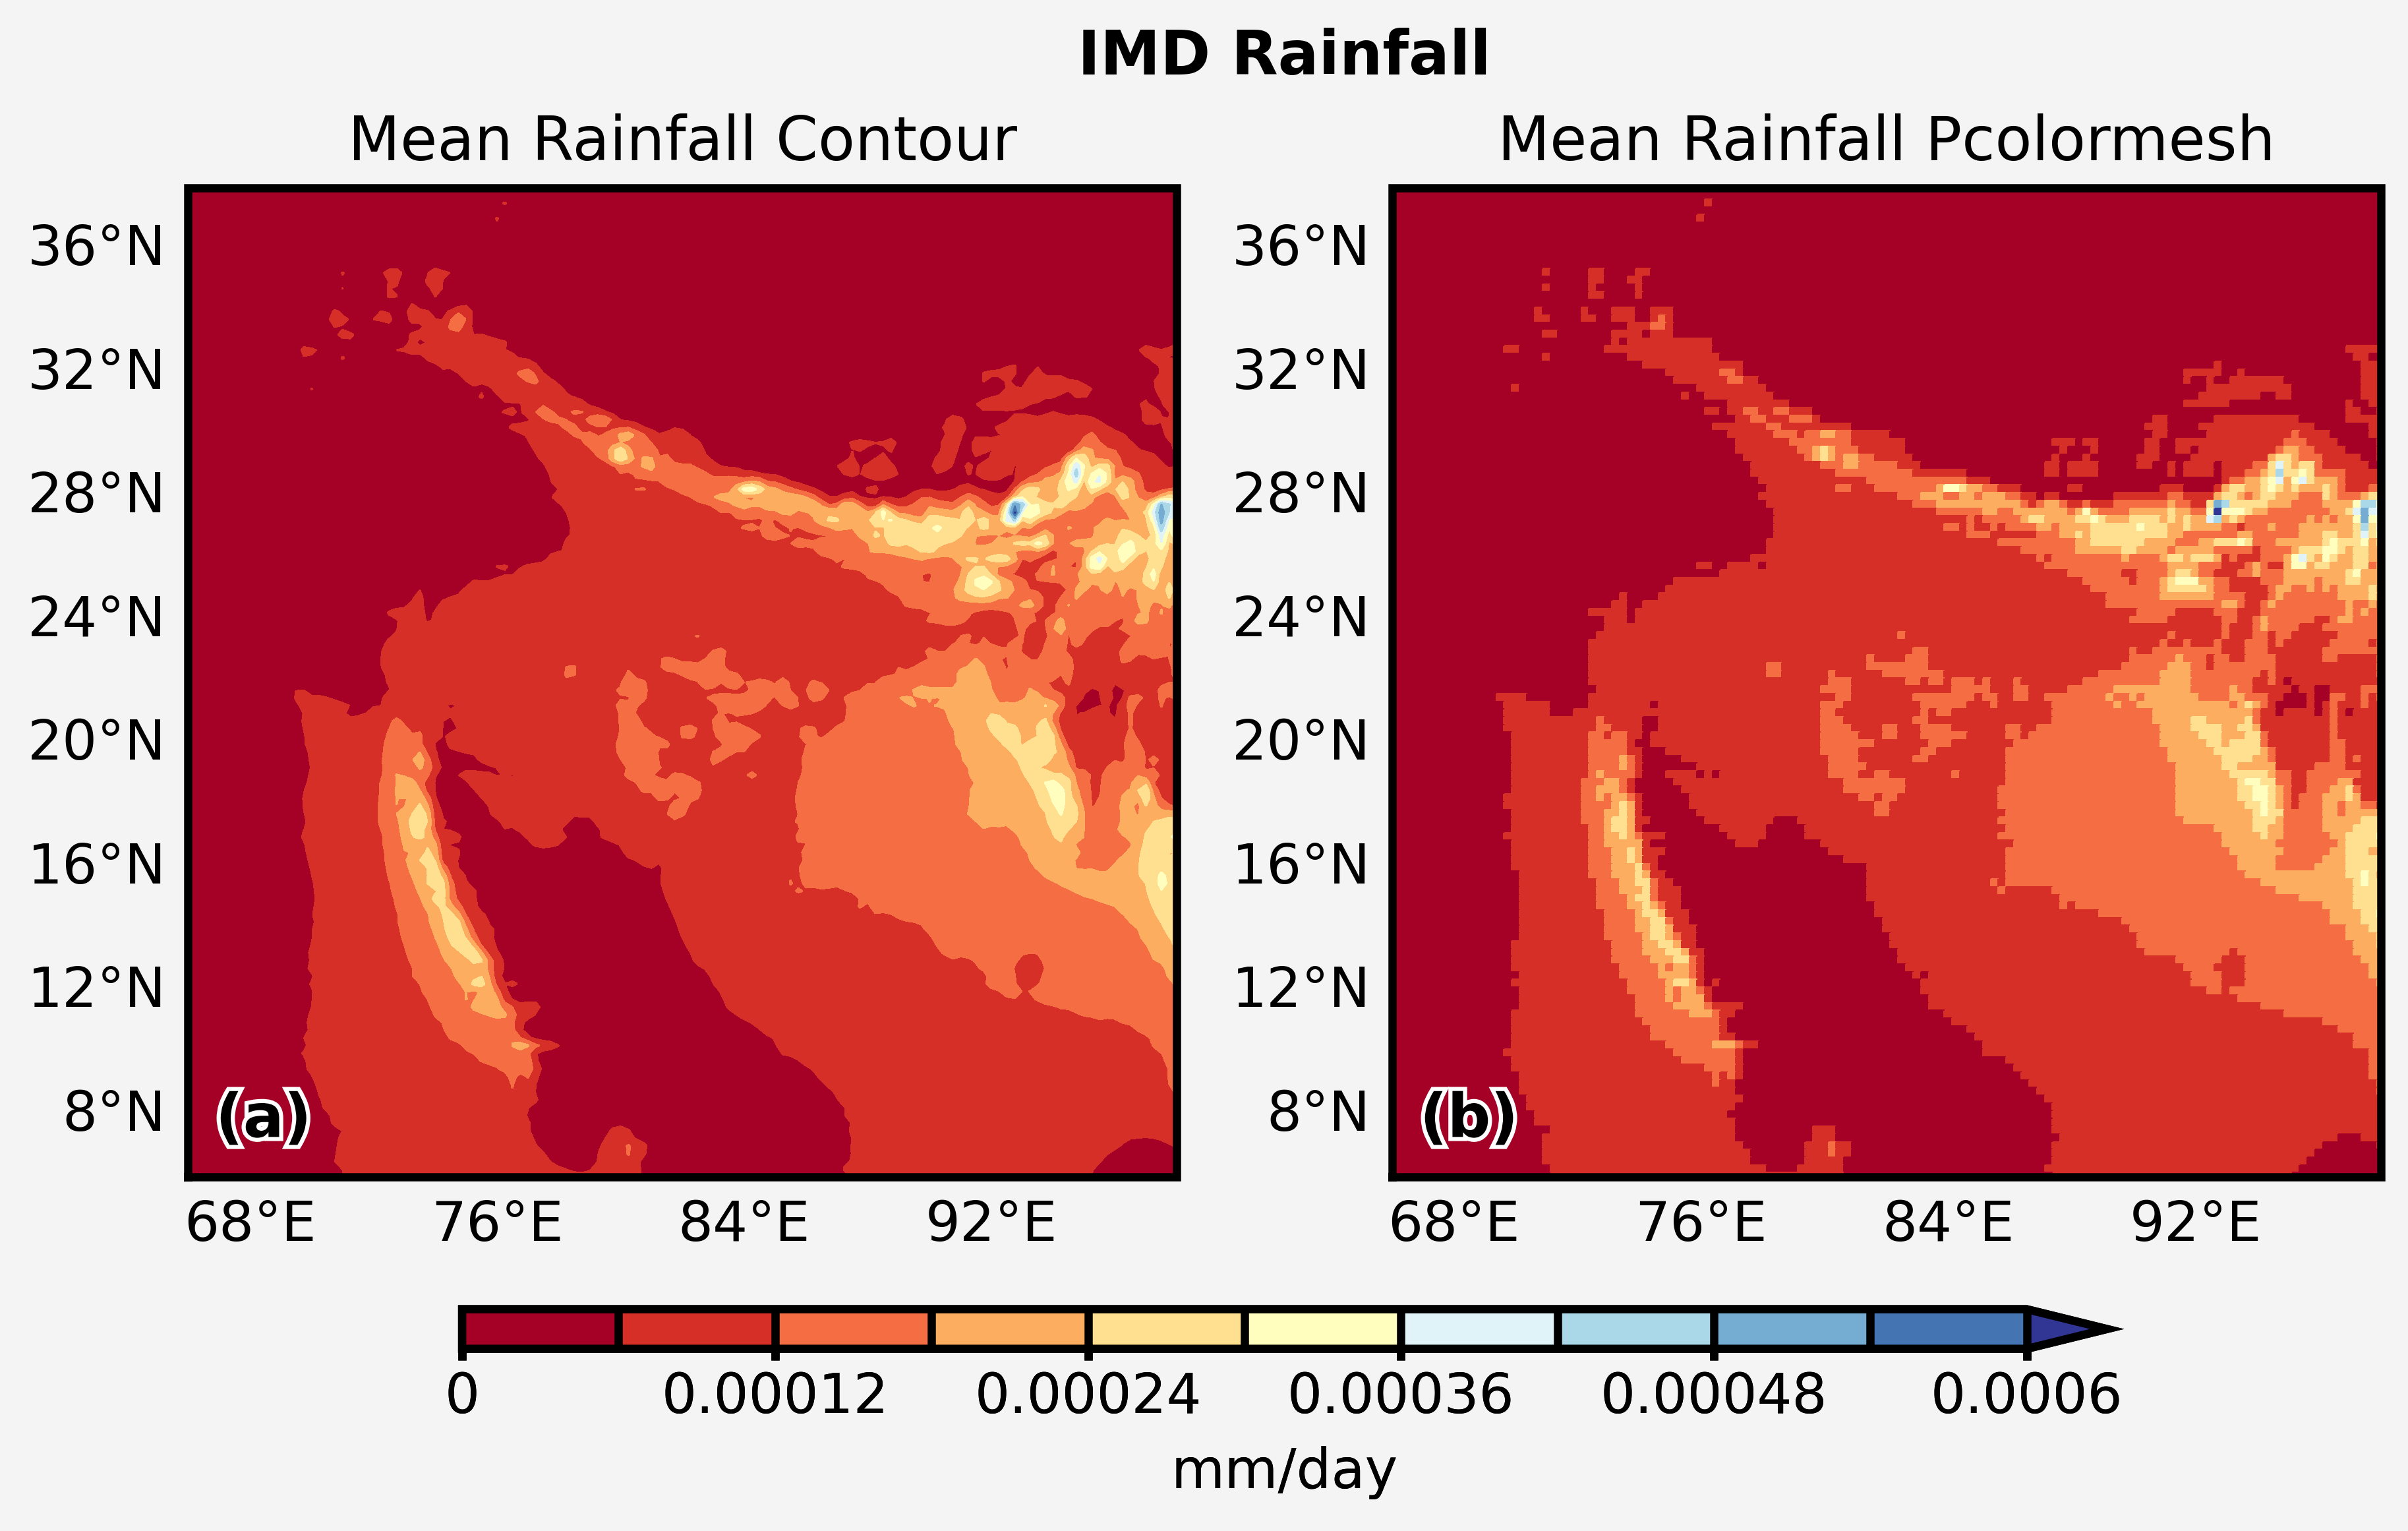

In [7]:
# Generate the figure and axis with nrows and ncols for subplots ###
fig, axs=plot.subplots(ncols=2,nrows=1, proj='cyl', dpi=300,
                       tight=True) 

##### proj = 'cyl' is the Cylindrical Equidistant Map projection used by Cartopy ###
#### dpi = 300 ( recommended ) , 600 , 1200 

lat_min = 6 # Change accordingly
lat_max = 38 # lat max
lon_min = 66 ###
lon_max = 98
#levels=np.arange(0,10,1) # generates a sequence of numbers from 0 to 10 with  a spacing of 1
cm = 'RdYlBu' # Colormap 'rainbow' , 'viridis', 'RdYlBu', 'RdBu' etc..
ex= 'max' # Color bar arrow ,'min', 'max', 'none','both'

#Now, we can format all the axes at once using these commands

axs.format(lonlim=(lon_min, lon_max), 
           latlim=(lat_min, lat_max), 
           labels=True,
           innerborders=False, 
           latlines=4, lonlines=4,
           abc='(a)', abcloc='ll', 
           gridminor=False,
           suptitle='IMD Rainfall' )

######## Limits as above; ### labels = True for lat lon labels,
###### inner borders = False , If True, it will show rivers #####
###latlines=1, lonlines=1  spacing ########
#abc=False, It abc='(a)', it will automatically give subplot (a),(b),(c) etc....
####abcloc='ll', abc location
#### gridminor=False; if true it will show all gridlines of lat , lon


###########Subplots ################ 

#contourf for contours

#pcolormesh for psuedo color plot

#Each subplot axis is numbered as axs[0] or axs[1] etc....]

# 1st subplot

m=axs[0].contourf(ds_mean,     # Data to be plotted
                    cmap=cm,  # Colormap
                  extend=ex, 
                 transform=ccrs.PlateCarree(), # cartopy map projection
                  #levels=levels 
                  )

axs[0].format(title='Mean Rainfall Contour')


# 2nd subplot

n=axs[1].pcolormesh(ds_mean,
                    cmap=cm,  
                    extend=ex, 
                    transform=ccrs.PlateCarree(), 
                    #levels=levels 
                    )

axs[1].format(title='Mean Rainfall Pcolormesh')

# Colorbar

fig.colorbar(m,loc='b',drawedges=True, width = 0.10 , length=0.75, label='mm/day')

#fig.colorbar will ive 1 common colorbar for all plots. But for common colorbar give explict levels.

#Use axs[0].colorbar for individual colorbars ########    

# axs[1].colorbar(n,loc='b',drawedges=True, width = 0.10 , length=0.65, label= 'Rainfall')